In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import mlflow
import mlflow.sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [8]:
df = pd.read_csv("..//dataset//processed/final_dataset.csv")
print(df)

       year  month  day  hour  DE_wind_generation_actual  DE_wind_capacity  \
0      2015      1    1     0                     8852.0           27913.0   
1      2015      1    1     1                     9054.0           27913.0   
2      2015      1    1     2                     9070.0           27913.0   
3      2015      1    1     3                     9163.0           27913.0   
4      2015      1    1     4                     9231.0           27913.0   
...     ...    ...  ...   ...                        ...               ...   
43819  2019     12   31    19                     8875.0           50452.0   
43820  2019     12   31    20                     7652.0           50452.0   
43821  2019     12   31    21                     7283.0           50452.0   
43822  2019     12   31    22                     6573.0           50452.0   
43823  2019     12   31    23                     6573.0           50452.0   

       DE_wind_speed  DE_temperature  DE_air_density  
0       

In [9]:
features = ['year','month','day','hour','DE_wind_capacity', 'DE_wind_speed', 'DE_temperature', 'DE_air_density']
target = 'DE_wind_generation_actual'

In [ ]:
train_df = df[df['year']<=2018]
test_df = df[df['year']>2018]


,year,month,day,hour,DE_wind_generation_actual,DE_wind_capacity,DE_wind_speed,DE_temperature,DE_air_density
0,2015,1,1,0,8852.0,27913.0,2.307,-0.895,1.275
1,2015,1,1,1,9054.0,27913.0,2.347,-0.971,1.276
2,2015,1,1,2,9070.0,27913.0,2.394,-1.041,1.276
3,2015,1,1,3,9163.0,27913.0,2.396,-1.097,1.277
4,2015,1,1,4,9231.0,27913.0,2.420,-1.153,1.277
...,...,...,...,...,...,...,...,...,...
35059,2018,12,31,19,17587.0,48974.0,2.415,4.623,1.246
35060,2018,12,31,20,18871.0,48974.0,2.654,4.705,1.246
35061,2018,12,31,21,20270.0,48974.0,2.854,4.741,1.245
35062,2018,12,31,22,21405.0,48974.0,3.036,4.718,1.245


In [24]:
train_df

,year,month,day,hour,DE_wind_generation_actual,DE_wind_capacity,DE_wind_speed,DE_temperature,DE_air_density
0,2015,1,1,0,8852.0,27913.0,2.307,-0.895,1.275
1,2015,1,1,1,9054.0,27913.0,2.347,-0.971,1.276
2,2015,1,1,2,9070.0,27913.0,2.394,-1.041,1.276
3,2015,1,1,3,9163.0,27913.0,2.396,-1.097,1.277
4,2015,1,1,4,9231.0,27913.0,2.420,-1.153,1.277
...,...,...,...,...,...,...,...,...,...
35059,2018,12,31,19,17587.0,48974.0,2.415,4.623,1.246
35060,2018,12,31,20,18871.0,48974.0,2.654,4.705,1.246
35061,2018,12,31,21,20270.0,48974.0,2.854,4.741,1.245
35062,2018,12,31,22,21405.0,48974.0,3.036,4.718,1.245


In [25]:
test_df

,year,month,day,hour,DE_wind_generation_actual,DE_wind_capacity,DE_wind_speed,DE_temperature,DE_air_density
35064,2019,1,1,0,24905.0,48974.0,3.590,4.667,1.245
35065,2019,1,1,1,25208.0,48974.0,3.899,4.635,1.245
35066,2019,1,1,2,26568.0,48974.0,4.255,4.597,1.244
35067,2019,1,1,3,28500.0,48974.0,4.531,4.535,1.244
35068,2019,1,1,4,29808.0,48974.0,4.838,4.481,1.243
...,...,...,...,...,...,...,...,...,...
43819,2019,12,31,19,8875.0,50452.0,1.808,0.751,1.265
43820,2019,12,31,20,7652.0,50452.0,1.828,0.651,1.267
43821,2019,12,31,21,7283.0,50452.0,1.850,0.501,1.269
43822,2019,12,31,22,6573.0,50452.0,1.814,0.297,1.270


In [11]:
X_train,y_train = train_df[features], train_df[target]
X_test,y_test = test_df[features],test_df[target]

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model = RandomForestRegressor(n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features='log2', max_depth=30)
model.fit(X_train_scaled, y_train)
print("fitted random forest")

y_pred = model.predict(X_test_scaled)


fitted random forest


In [30]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

In [31]:
print(r2)
print(rmse)
print(mae)

0.8155455341675998
4264.207063292881
3443.8286504804764


Text(0.5, 1.0, 'Feature Importances')

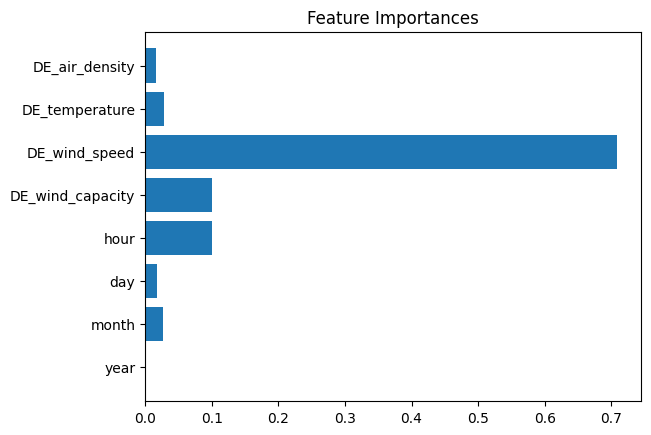

In [8]:
importances = model.feature_importances_
plt.barh(features, importances)
plt.title("Feature Importances")


In [23]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # Define the model
# rf = RandomForestRegressor(random_state=42)

# # Define the hyperparameters to tune
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
#     'max_depth': [10, 20, 30, None],  # Control overfitting
#     'min_samples_split': [2, 5, 10],  # Minimum samples required to split
#     'min_samples_leaf': [1, 2, 4],  # Minimum samples required at leaf node
#     'max_features': ['auto', 'sqrt', 'log2']  # Features to consider for split
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Best parameters from grid search
# print("Best Hyperparameters:", grid_search.best_params_)

# # Evaluate the best model
# best_model = grid_search.best_estimator_

# # Make predictions
# y_pred = best_model.predict(X_test)

# # Evaluate performance
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = best_model.score(X_test, y_test)

# print("RMSE:", rmse)
# print("R²:", r2)


In [41]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
#     'max_depth': [10, 20, 30, None],  # Control overfitting
#     'min_samples_split': [2, 5, 10],  # Minimum samples required to split
#     'min_samples_leaf': [1, 2, 4],  # Minimum samples required at leaf node
#     'max_features': ['auto', 'sqrt', 'log2']  # Features to consider for split
# }

# # Set up RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='neg_mean_squared_error')

# # Fit the model
# random_search.fit(X_train, y_train)

# # Best parameters from random search
# print("Best Hyperparameters:", random_search.best_params_)

# # Evaluate the best model
# best_model = random_search.best_estimator_

# # Make predictions
# y_pred = best_model.predict(X_test)

# # Evaluate performance
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = best_model.score(X_test, y_test)

# print("RMSE:", rmse)
# print("R²:", r2)


Text(0.5, 1.0, 'Feature Importances')

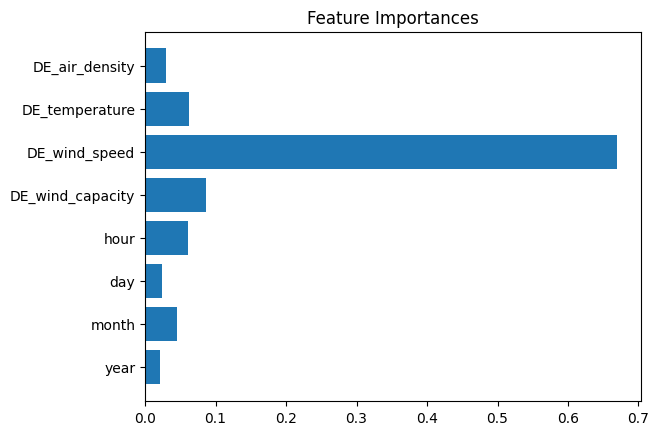

In [32]:
importances = model.feature_importances_
plt.barh(features, importances)
plt.title("Feature Importances")


In [37]:
test_df['predicted_wind_generation'] = model.predict(X_test_scaled)

C:\Users\ursal\AppData\Local\Temp\ipykernel_45356\2701027950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_wind_generation'] = model.predict(X_test_scaled)


In [38]:
subset = test_df[(test_df['year'] == 2019) &
                 (test_df['month'] == 1) &
                 (test_df['day'] >=1) & (test_df['day']<=8)]

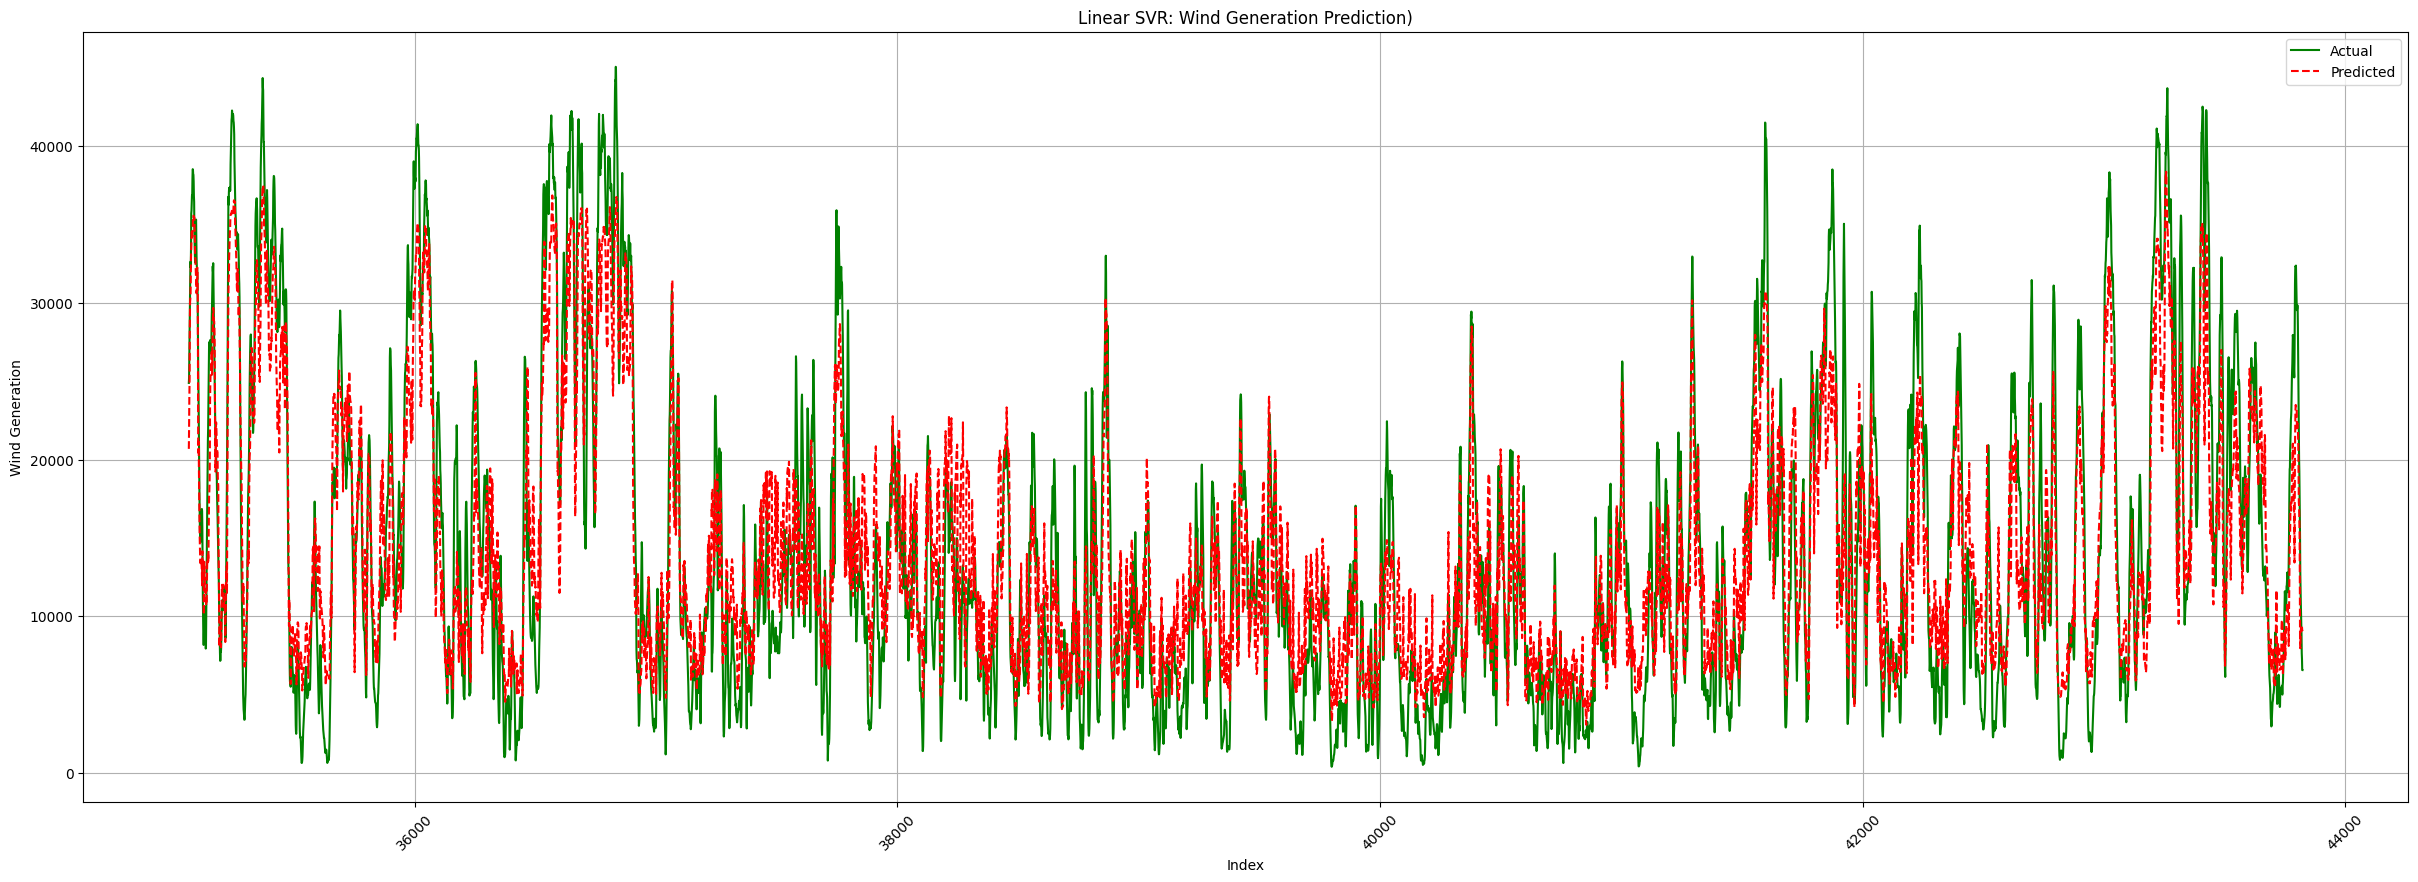

In [39]:
plt.figure(figsize=(30, 10))
plt.plot(test_df.index, test_df['DE_wind_generation_actual'], label="Actual", color="green")
plt.plot(test_df.index, test_df['predicted_wind_generation'], label="Predicted", color="red", linestyle="dashed")
plt.title('Linear SVR: Wind Generation Prediction)')
plt.xlabel('Index')
plt.ylabel('Wind Generation')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

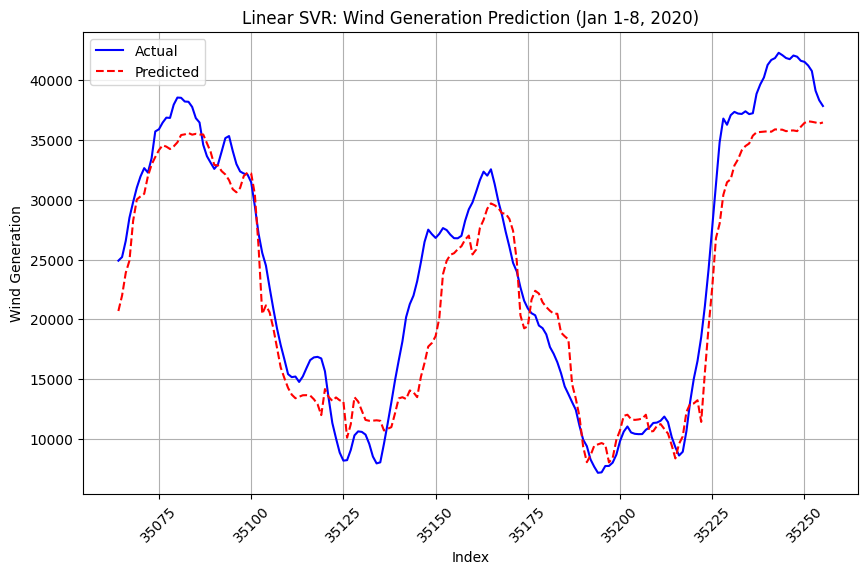

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(subset.index, subset['DE_wind_generation_actual'], label="Actual", color="blue")
plt.plot(subset.index, subset['predicted_wind_generation'], label="Predicted", color="red", linestyle="dashed")
plt.title('Linear SVR: Wind Generation Prediction (Jan 1-8, 2020)')
plt.xlabel('Index')
plt.ylabel('Wind Generation')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()